# Quiz 4
DS 3000
Spring 2021

After completing the quiz below, please follow the instructions below to submit:
1. "Kernel" -> "Restart & Run All"
1. save your quiz file to this latest version
1. upload the `.ipynb` to gradescope **before** clicking submit
1. ensure that you can see your jupyter notebook in the gradescope interface after clicking "submit"

We specify the last note above as gradescope will allow you to "submit" without uploading a file.  It is your responsibility to ensure that you've actually submitted a file.

## Part 1: Classifying Wine (70 points)

Given the wine dataset from sklearn:

In [1]:
from sklearn.datasets import load_wine

wine_dict = load_wine()

x_feat_list = wine_dict['feature_names']
y_feat = wine_dict['target_names']
x = wine_dict['data']
y = wine_dict['target']

In [2]:
wine_dict

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Evaluate the performance of each of the following classifiers.
- DecisionTreeClassifier
    - `max_depth=3`
- RandomForestClassifier
    - `max_depth=3`
- KNeighborsClassifier
    - `n_neighbors=7`
    
To evalute the performance of each, write a function `cross_val_classify(x, y, clf, n_splits=10)`
- inputs:
    - `x`: input features
    - `y`: target class
    - `clf`: an sklearn classifier object
        - for example `clf = DecisionTreeClassifier(n_neighbors=7)`
    - `n_splits`: number of splits in StratifiedKFold cross validation
- returns:
    - `y_pred`: cross validated prediction of each sample (same size as `y`)
    
Using the `cross_val_classify()` function you've written above to compute and plot a confusion matrix for each.  Be sure to title each confusion matrix with the name of the classifier it represents.  (+2 extra credit: use a loop over each classifier object & title rather than copying code 3 times).

As always, documentation counts.  (comments, code chunking, docstrings, variable names)

In [3]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
# we used these imports in the solution, you may use others as well if you find you need them
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def cross_val_classify(x, y, clf, n_splits = 10):
    '''
    the function is used to evaluate the perforemance of tree model, dt,knn, rf
    
    Args:
    x(array of array): the input numerical features
    y(array): the target class:
    clf: model, dt, knn, or rf
    n_splits: number of splits in StratifiedKFold cross validation
    
    returns:
        y_pred: cross validated prediction of each sample (same size as y)
    
    
    '''
    
    # "Stratified" ensures (roughly) same number of species across folds
  
    kfold = StratifiedKFold(n_splits=n_splits)
    
    
    # initialize an empty array same size as y_true
    y_pred = np.empty_like(y)
    for train_idx, test_idx in kfold.split(x, y):
        x_train = x[train_idx, :]
        y_train = y[train_idx]
        
        x_test = x[test_idx, :]
        
        clf.fit(x_train, y_train)
        
        
        
        y_pred[test_idx] = clf.predict(x_test)
        
        
    # compute confusion matrix
    conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
    
    
    # polot confusion matrix
    conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))
    
        
    conf_mat_disp.plot()
        
 
        
    
     
    
    return y_pred
    

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

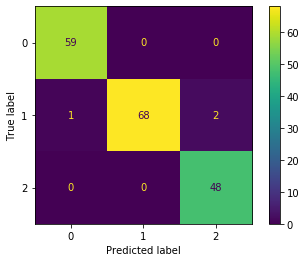

In [7]:
# call teh randomforestclassifier model
y_pred_rf = cross_val_classify(x,y, RandomForestClassifier(max_depth = 3),n_splits = 10)
y_pred_rf

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

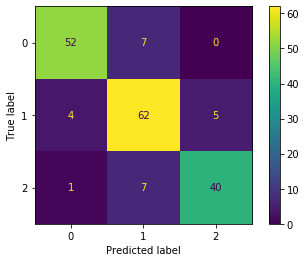

In [8]:
y_pred_dt = cross_val_classify(x,y,DecisionTreeClassifier(max_depth = 3),n_splits =10)
y_pred_dt

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0,
       0, 1])

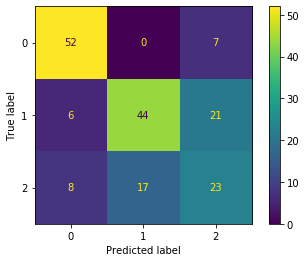

In [9]:
y_pred_kn = cross_val_classify(x,y,KNeighborsClassifier(n_neighbors=7),n_splits =10)
y_pred_kn

## Part 2: Qualitative Evaluation (30 points: 3 pts per position)

Using the abbreviations:
 - **RF**: Random Forest
 - **KNN**: K-Nearest Neighbor
 - **DT**: Decision Tree
 
Rank each of the qualities below by writing their abbreviations into each empty cell in the markdown table below.  You need not fill in positions marked with a `-`

The first row below is a quick example to demonstrate the markdown table's notation (i.e. "Decision Tree" is earlier, alphabetically, than the other classifier names).
 
|                                            | Best | Second Best | Worst |
|:------------------------------------------:|:----:|:-----------:|:-----:|
|        Early in an alpha sorted list       |  DT  |     KNN     |   RF  |
|     Most Accurate on this example          |      |             |       |
|            Easiest to implement            |      |             |       |
|     Best to investigate variable importance    |      |             |       |
| Best at handling features with different scales|   -   |     -           |      |


We provide further explanation about each category below:
- Most accurate in this example
    - Which classifiers make the fewest mistakes across all samples in this dataset
- Easiest to implement
    - Assume [the wonderful folks at sklearn](https://scikit-learn.org/stable/about.html) never built these algorithms for us to use and we had to build everything using the tools given by `numpy` and `scipy`.  Which would be the easiest to implement?
- Best to investigate variable importance
    - Which method offers the most insight into why it makes the decisions it does?  (Which features are most significant in making a decision?)
- Best at handling features with different scales
    - The variance of `sex` is much smaller than the variance of `body_mass_g` in the penguin dataset.  Which method struggles the most with this fact if appropriate actions aren't taken?

# Answer of the ranking:


|                                            | Best | Second Best | Worst |
|:------------------------------------------:|:----:|:-----------:|:-----:|
|        Early in an alpha sorted list       |  DT  |     KNN     |   RF  |
|     Most Accurate on this example          |    RF  |     DT        |  KNN     |
|            Easiest to implement            |  DT    |    KNN         |   RF    |
|     Best to investigate variable importance    |  RF    |   DT          |   KNN    |
| Best at handling features with different scales|   -   |     -           |    DT  |
